# ******Home Loan Eligibility Prediction ******

# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data collection 

In [2]:
#loading dataset to pandas dataframe
data=pd.read_csv(r"C:\Users\kalyani\Documents\loan-train.csv",header=0)
df=pd.DataFrame(data)

# Summerization of data

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
#printimg first 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#number of rows and columns in a dataframe
df.shape

(614, 13)

In [7]:
df.groupby("Gender").agg({"ApplicantIncome":["max","min"]})

ApplicantIncome     
                   max  min
Gender                     
Female           19484  210
Male             81000  150

In [8]:
#statistical measurments 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Processing

In [9]:
#To know number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Filling gender nan values with mode
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])


In [11]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df[df["Credit_History"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [13]:
df["Credit_History"]=df["Credit_History"].fillna(-1)

In [14]:
df["Credit_History"].isnull().sum()

0

In [15]:
display(df.loc[df.Loan_Status=="Y",["Credit_History","Loan_Status"]])

,Credit_History,Loan_Status
0,1.0,Y
2,1.0,Y
3,1.0,Y
4,1.0,Y
5,1.0,Y
...,...,...
608,1.0,Y
609,1.0,Y
610,1.0,Y
611,1.0,Y


In [16]:
display(df.loc[(df.Credit_History==1)&(df.Loan_Status=="Y"),["Credit_History","Loan_Status"]])

,Credit_History,Loan_Status
0,1.0,Y
2,1.0,Y
3,1.0,Y
4,1.0,Y
5,1.0,Y
...,...,...
608,1.0,Y
609,1.0,Y
610,1.0,Y
611,1.0,Y


In [17]:
df["Credit_History"]=np.where((df["Credit_History"]==-1)&(df["Loan_Status"]=="Y"),1,df["Credit_History"])

In [18]:
display(df.loc[df.Credit_History==-1])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,-1.0,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,-1.0,Urban,N
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,-1.0,Semiurban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,-1.0,Urban,N
129,LP001465,Male,Yes,0,Graduate,No,6080,2569.0,182.0,360.0,-1.0,Rural,N
181,LP001634,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,-1.0,Rural,N
236,LP001786,Male,Yes,0,Graduate,NaN,5746,0.0,255.0,360.0,-1.0,Urban,N
259,LP001864,Male,Yes,3+,Not Graduate,No,4931,0.0,128.0,360.0,-1.0,Semiurban,N
449,LP002444,Male,No,1,Not Graduate,Yes,2769,1542.0,190.0,360.0,-1.0,Semiurban,N
503,LP002618,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,-1.0,Rural,N


In [19]:
display(df.loc[df.Loan_Status=='N',["Credit_History","Loan_Status"]])

,Credit_History,Loan_Status
1,1.0,N
7,0.0,N
9,1.0,N
13,1.0,N
17,0.0,N
...,...,...
596,1.0,N
597,0.0,N
600,-1.0,N
605,1.0,N


In [20]:
display(df.loc[(df.Credit_History==0)&(df.Loan_Status=="N"),["Credit_History","Loan_Status"]])

,Credit_History,Loan_Status
7,0.0,N
17,0.0,N
20,0.0,N
22,0.0,N
23,0.0,N
...,...,...
576,0.0,N
584,0.0,N
589,0.0,N
597,0.0,N


In [21]:
display(df.loc[(df.Credit_History==1)&(df.Loan_Status=="N"),["Credit_History","Loan_Status"]])

,Credit_History,Loan_Status
1,1.0,N
9,1.0,N
13,1.0,N
18,1.0,N
28,1.0,N
...,...,...
581,1.0,N
585,1.0,N
591,1.0,N
596,1.0,N


In [22]:
df["Credit_History"]=np.where((df["Credit_History"]==-1)&(df["Loan_Status"]=="N"),1,df["Credit_History"])

In [23]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
#handling missing values self employment 

In [25]:
display(df.loc[(df.Self_Employed=="Yes")&(df.Loan_Status=="Y"),["Self_Employed","Loan_Status"]])#50 records

,Self_Employed,Loan_Status
2,Yes,Y
5,Yes,Y
25,Yes,Y
44,Yes,Y
68,Yes,Y
71,Yes,Y
74,Yes,Y
79,Yes,Y
81,Yes,Y
113,Yes,Y


In [26]:
display(df.loc[(df.Self_Employed=="No")&(df.Loan_Status=="Y"),["Self_Employed","Loan_Status"]])

,Self_Employed,Loan_Status
0,No,Y
3,No,Y
4,No,Y
6,No,Y
8,No,Y
...,...,...
608,No,Y
609,No,Y
610,No,Y
611,No,Y


In [27]:
display(df.loc[(df.Self_Employed=="Yes")&(df.Loan_Status=="N"),["Self_Employed","Loan_Status"]])#26 records

,Self_Employed,Loan_Status
32,Yes,N
54,Yes,N
62,Yes,N
77,Yes,N
128,Yes,N
174,Yes,N
186,Yes,N
199,Yes,N
226,Yes,N
245,Yes,N


In [28]:
display(df.loc[(df.Self_Employed=="No")&(df.Loan_Status=="N"),["Self_Employed","Loan_Status"]])

,Self_Employed,Loan_Status
1,No,N
7,No,N
9,No,N
13,No,N
17,No,N
...,...,...
583,No,N
584,No,N
585,No,N
597,No,N


In [29]:
df["Self_Employed"]=df["Self_Employed"].fillna("Not")

In [30]:
df["Self_Employed"].isnull().sum()

0

In [31]:
display(df.loc[df.Self_Employed=="Not",["Self_Employed","Loan_Status"]])

,Self_Employed,Loan_Status
11,Not,Y
19,Not,Y
24,Not,N
29,Not,Y
30,Not,N
95,Not,N
107,Not,N
111,Not,Y
114,Not,Y
158,Not,Y


In [32]:
df["Self_Employed"]=np.where((df["Self_Employed"]=="Not"),"No",df["Self_Employed"])

In [33]:
#Filling nan values in dependents with mode

In [34]:
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])

In [35]:
#Filling nan values in  Loan_Amount_Term with mode
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())

In [36]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
#dropping missing values in Loan amount
df1=df.dropna()

In [38]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
df1.shape

(592, 13)

In [40]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [41]:
#change the labels in LOan_Status column
df1["Loan_Status"].replace('Y',1,inplace=True)
df1["Loan_Status"].replace('N',0,inplace=True)


C:\Users\kalyani\.config\anakonda\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [43]:
#To know the different values count in dependent column
df1["Dependents"].value_counts()


0     347
2      98
1      98
3+     49
Name: Dependents, dtype: int64

In [44]:
#replace the value 3+ into 4
df1=df1.replace(to_replace="3+",value=4)

In [45]:
df1["Dependents"].value_counts()

0    347
2     98
1     98
4     49
Name: Dependents, dtype: int64

# visualizing data

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

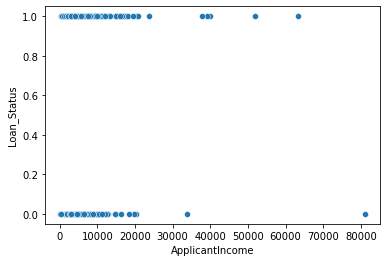

In [46]:
sns.scatterplot(x=df1["ApplicantIncome"],y=df1["Loan_Status"])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

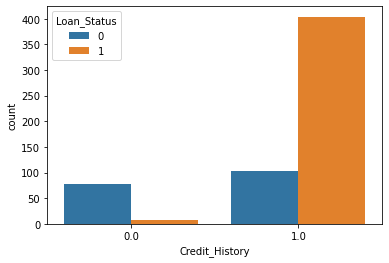

In [47]:
sns.countplot(x="Credit_History",hue="Loan_Status",data=df1)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

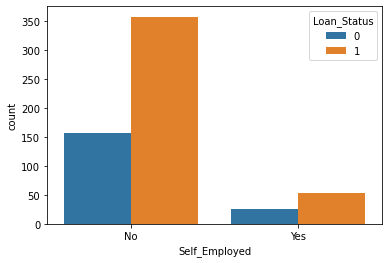

In [48]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df1)

In [49]:
#convert categorical columns to numerical values
df1.replace({"Married":{'No':0,'Yes':1},"Gender":{'Male':1,'Female':0},"Self_Employed":{'No':0,'Yes':1},"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [51]:
#separating the data and label
X=df1.drop(columns=["Loan_ID","Loan_Status"],axis=1)
Y=df1["Loan_Status"]

In [52]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [53]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 592, dtype: int64


# splitting the data into train and test data


In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [55]:
print(X.shape,X_train.shape,X_test.shape)

(592, 11) (473, 11) (119, 11)


# Training the model  

In [56]:
classifier=svm.SVC(kernel='linear')

In [57]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# Model Evalution

In [56]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [57]:
print("accuracy value of training dataset:",training_data_accuracy)

accuracy value of training dataset: 0.7928118393234672


In [58]:
X_test_prediction=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [59]:
print("accuracy value of testing dataset:",testing_data_accuracy)

accuracy value of testing dataset: 0.7983193277310925


# Making predictive system

In [101]:
input_data=(1,1,0,1,0,150,1800,135,360,1,0)
input_data_as_array=np.asarray(input_data)
if((input_data_as_array[5]<150)):
    print("Not elgible");
else: 
    #reshaping the array for predicting one instance
    input_data_reshaped=input_data_as_array.reshape(1,-1)
    #print(input_data_reshaped)
    prediction=classifier.predict(input_data_reshaped)
    print(prediction)
    if(prediction[0]==0):
        print("Not Eligible for Loan")
    else:
        print("Eligible for Loan")

[1]
Eligible for Loan
